## Adding weights to edges

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
import pylab

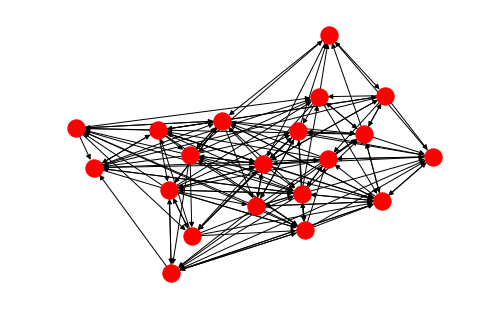

In [2]:
er = nx.erdos_renyi_graph(directed=True, n=20, p=np.random.rand(1)[0])

nx.draw(er)
plt.show()

In [3]:
for u,v,a in er.edges(data=True):
    a['weight'] = 2*np.random.rand(1)[0] - 1

for i, n in er.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0]-1

In [4]:
A = nx.adjacency_matrix(er)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(er), axis=1)).reshape(-1))

In [5]:
dt = 0.005
N = nx.number_of_nodes(er)
n_iter = 1000
x = np.zeros((n_iter, N))
# for saddle node
# x[0] = 0.85 - np.random.rand(N)/100

# transcritical
x[0] = np.random.rand(N)

In [6]:
for iter in np.arange(0,n_iter-1):
    dxdt = -D.dot(x[iter])
    x[iter+1] = x[iter] + dxdt*dt

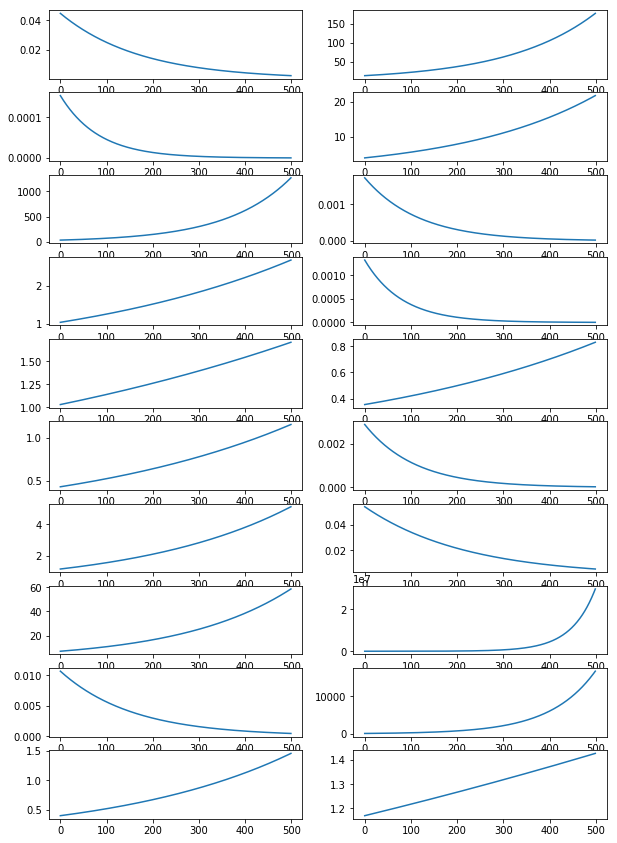

In [15]:
plt.figure(figsize=(10, 30))
for i in np.arange(N):
    plt.subplot(N, 2, i+1)
    plt.plot(x[500:,i])
plt.show()

In [8]:
np.linalg.matrix_rank(D-A)

19

In [9]:
x[999,:]

array([2.47233067e-03, 1.77598717e+02, 3.60642686e-07, 2.16913188e+01,
       1.27085729e+03, 2.35602394e-05, 2.68313470e+00, 2.61789746e-06,
       1.70441889e+00, 8.30837004e-01, 1.15691811e+00, 2.93794333e-05,
       5.11446775e+00, 5.51340068e-03, 5.84494185e+01, 2.97439669e+07,
       4.31882964e-04, 1.66432453e+04, 1.45854224e+00, 1.42667447e+00])

In [10]:
u, s, v = np.linalg.svd(D-A)
print(s)

[5.04739480e+00 3.65259402e+00 3.17109204e+00 2.98262104e+00
 2.75948678e+00 2.47811902e+00 2.23357648e+00 2.03753400e+00
 1.87582273e+00 1.71571458e+00 1.53052962e+00 1.25697175e+00
 1.08768417e+00 9.31550516e-01 8.14179924e-01 4.91375361e-01
 4.00188009e-01 3.65876112e-01 1.74495403e-01 2.59761298e-17]
